In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('anime.csv')

In [5]:
df.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
df.tail(5)

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [7]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [9]:
df.shape

(12294, 7)

In [10]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [13]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [14]:
df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [15]:
df.index

RangeIndex(start=0, stop=12294, step=1)

In [16]:
df.sample(5)

,anime_id,name,genre,type,episodes,rating,members
2097,7745,Zettai Karen Children OVA: Aitazousei! Ubaware...,"Action, Comedy, Shounen, Supernatural",OVA,1,7.36,4277
5111,761,Naruto: Akaki Yotsuba no Clover wo Sagase,"Adventure, Comedy, Shounen",Special,1,6.55,47587
2625,6203,Sasameki Koto,"Comedy, Romance, School, Shoujo Ai",TV,13,7.21,34297
7030,5647,Doukyuusei 2 (OVA) Special: Sotsugyousei,"Ecchi, Harem, School",OVA,3,5.78,526
10140,22399,Saru Kani Gassen,Kids,OVA,1,5.23,62


In [20]:
df.value_counts('genre')

np.int64(12232)

In [22]:
df['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], shape=(3265,), dtype=object)

In [32]:
df.dropna(inplace=True)
df.isnull().sum()

name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [24]:
df.shape

(12017, 7)

In [25]:
df.drop(['anime_id'],axis=1,inplace=True)

In [26]:
df.shape

(12017, 6)

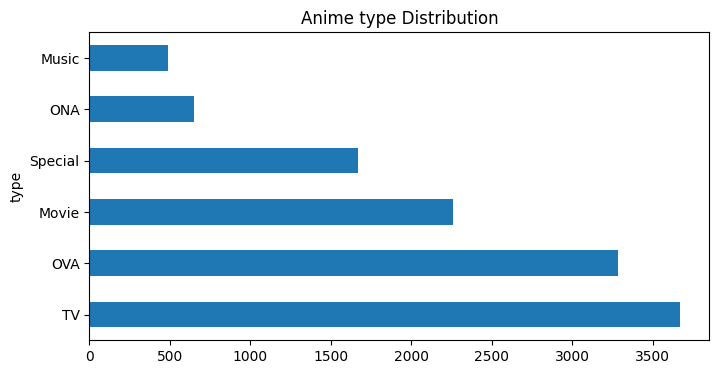

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
df['type'].value_counts().plot(kind='barh',title="Anime type Distribution")
plt.show()

In [33]:
df['genre'] = df['genre'].fillna('')

In [34]:
df['genre']

0                     Drama, Romance, School, Supernatural
1        Action, Adventure, Drama, Fantasy, Magic, Mili...
2        Action, Comedy, Historical, Parody, Samurai, S...
3                                         Sci-Fi, Thriller
4        Action, Comedy, Historical, Parody, Samurai, S...
                               ...                        
12289                                               Hentai
12290                                               Hentai
12291                                               Hentai
12292                                               Hentai
12293                                               Hentai
Name: genre, Length: 12017, dtype: object

In [36]:
# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['genre'])
tfidf_matrix.shape

(12017, 46)

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [40]:
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

def recommend_anime(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # top 10 recommendations
    anime_indices = [i[0] for i in sim_scores]
    return df['name'].iloc[anime_indices]

In [51]:
recommend_anime("Dragon Ball")

206                                         Dragon Ball Z
515                                Dragon Ball Kai (2014)
588                                       Dragon Ball Kai
1409                Dragon Ball Z Movie 15: Fukkatsu no F
1930                                    Dragon Ball Super
3203               Dragon Ball Z: Summer Vacation Special
4275                 Dragon Ball Z: Atsumare! Gokuu World
4314    Dragon Ball GT: Goku Gaiden! Yuuki no Akashi w...
5999    Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...
1227                 Dragon Ball Z Movie 14: Kami to Kami
Name: name, dtype: object

<Axes: >

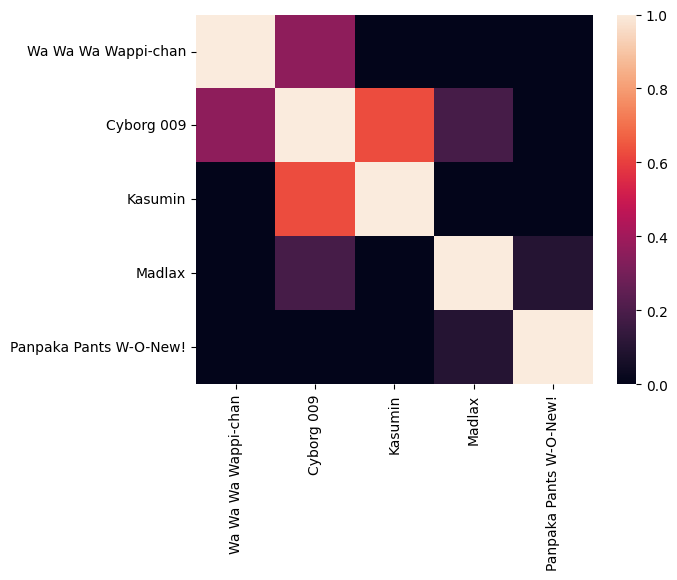

In [52]:
import seaborn as sns

sample = df.sample(5)
sample_indices = sample.index
sim_sample = cosine_sim[sample_indices][:, sample_indices]

sns.heatmap(sim_sample, xticklabels=sample['name'], yticklabels=sample['name'])